
 Dataset : /home/jovyan/dataset/indy/Sorted_Spike_Dataset/indy_20160407_02.mat


Text(-1.57, 165.63431360896843, '30 trails')

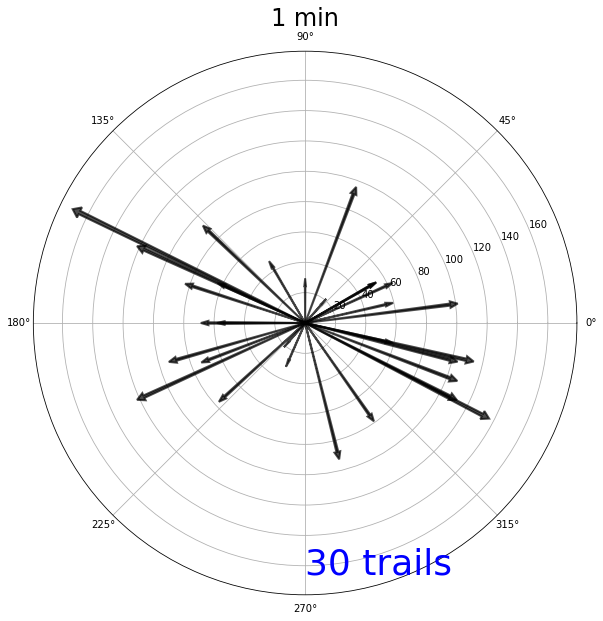

In [18]:
import get_data
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import os
import h5py
import param

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

dataset_path = '/home/jovyan/dataset/indy/Sorted_Spike_Dataset/'
if os.path.isdir(dataset_path) != True:
    print('\n>> Not find dataset folder path: '+dataset_path)
    print('>> Please Check folder_path && Computer working system !\n')

save_path = '/home/ogk/Documents/OGK/Trajectory/target_vector/else/'  ########################

# for session in range(1, 38):
session = 1
List_File = os.listdir(dataset_path)
List_File.sort()
file_name = List_File[session-1]
print('\n Dataset :',dataset_path+str(file_name))
mat_file = h5py.File(dataset_path+str(file_name), 'r') # read mat 
TARGET = mat_file[list(mat_file.keys())[6]]
target_x = TARGET[0][::param.bin_width]
target_y = TARGET[1][::param.bin_width]

time = 1 # mins
duration_1 = int(time*(60*1000)/64)
time = 3 # mins
duration_3 = int(time*(60*1000)/64)
time = 5 # mins
duration_5 = int(time*(60*1000)/64) ####################################################

target_x = np.resize(target_x, (len(target_x), 1))
target_y = np.resize(target_y, (len(target_y), 1))
target_xy = np.hstack((target_x, target_y))

target = target_xy[:duration_1, :]  ## duration_5可改duration_1、duration_3(注意冒號位置)
for index in range(len(target)):
    if index == 0:
        Target = target[index, :].reshape(1, 2)
    else:
        if target[index, 0] != target[index-1, 0] or target[index, 1] != target[index-1, 1]:
            Target = np.concatenate((Target, (target[index, :]).reshape(1, 2)), axis=0)
for index in range(len(Target)):
    vector = Target[1:, :]-Target[:-1, :]
pol = []
for index in range(len(vector)):
    pol.append(cart2pol(vector[index, 0], vector[index, 1]))
pol=np.array(pol)
r = pol[:, 0]
angle = pol[:, 1]


fig, ax = plt.subplots(subplot_kw = dict(projection='polar'), figsize=(10, 10))
# plt.subplots_adjust(wspace=0.3, hspace=0.3)
ax.set_rmax(np.max(abs(r)))
ax.set_title('1 min', fontsize=24) ## 改tittle(多少時間內的紀錄)
for i in range(len(r)):
    plt.arrow(angle[i], 0, 0, r[i], alpha = 0.7, width = 0.015,
                 edgecolor = 'black', facecolor = 'black', lw = 2, zorder = 5, head_length=5)
plt.text(-1.57, np.max(abs(r)), str(len(r))+' trails', fontdict={'size':'36','color':'b'})    